# Exploratory Data Analysis - Spanish Movie Reviews
**By Zach Friedman**, zacheryfriedman@my.unt.edu

- Get most frequent sentiment words
- Visualize sentiment words in English translations (need sentiment word dictionary)

In [33]:
import pandas as pd
import regex as re
import spacy
import nltk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from nltk.tokenize import WordPunctTokenizer, sent_tokenize
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('sentiwordnet')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /home/zach/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/zach/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /home/zach/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /home/zach/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/zach/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/zach/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
df = pd.read_csv('./IMDB_Dataset_SPANISH.csv')
df.shape

(50000, 5)

In [4]:
df.head()

,Unnamed: 0,review_en,review_es,sentiment,sentimiento
0,0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo


In [5]:
df = df.drop(['Unnamed: 0'], 1)

/tmp/ipykernel_32618/1816312852.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Unnamed: 0'], 1)


In [6]:
df.isnull().sum()

review_en      0
review_es      0
sentiment      0
sentimiento    0
dtype: int64

At first glance at the data, see punctuation error present in the second sample. 
- Missing space between first and second sentences.
- Want to use regex to get the number of instances like the following.
- A tokenizer can probably handle this easily. Still may be useful to know.

In [7]:
es = df.iloc[1]['review_es']
en = df.iloc[1]['review_en'] 
print(f"ES:\n{es}\n")
print(f"EN:\n{en}\n")

ES:
Una pequeña pequeña producción.La técnica de filmación es muy incuestionable, muy antigua, la moda de la BBC y le da una sensación de realismo reconfortante, y, a veces, incómodo, y, a veces, a la pieza.Los actores son extremadamente bien elegidos, Michael Sheen, no solo "tiene todo el polari", ¡pero tiene todas las voces por palmaditas!Realmente puede ver la edición perfecta guiada por las referencias a las entradas del diario de Williams, no solo vale la pena la observación, pero es una pieza imperrementemente escrita y realizada.Una producción magistral sobre uno de los grandes maestros de la comedia y su vida.El realismo realmente llega a casa con las pequeñas cosas: la fantasía del guardia que, en lugar de usar las técnicas de "sueño" tradicionales permanece sólido, entonces desaparece.Se desempeña nuestro conocimiento y nuestros sentidos, particularmente con las escenas relacionadas con Orton y Halliwell y los conjuntos (particularmente de su apartamento con murales de Halliw

In [8]:
# Select the rows where there is no space between Spanish sentences
pattern = r'([a-z]\S[A-Z])'
mask = df['review_es'].str.contains(pattern)

filtered_df = df[mask]
filtered_df

/tmp/ipykernel_32618/2546349624.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df['review_es'].str.contains(pattern)


,review_en,review_es,sentiment,sentimiento
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
5,"Probably my all-time favorite movie, a story o...",Probablemente mi película favorita de todos lo...,positive,positivo
6,I sure would like to see a resurrection of a u...,Seguro que me gustaría ver una resurrección de...,positive,positivo
...,...,...,...,...
49993,Robert Colomb has two full-time jobs. He's kno...,Robert Colomb tiene dos trabajos a tiempo comp...,negative,negativo
49994,This is your typical junk comedy.There are alm...,Esta es tu comedia de chatarra típica. Casi no...,negative,negativo
49995,I thought this movie did a down right good job...,Pensé que esta película hizo un buen trabajo a...,positive,positivo
49996,"Bad plot, bad dialogue, bad acting, idiotic di...","Mala parcela, mal diálogo, mala actuación, dir...",negative,negativo


In [9]:
x = filtered_df.iloc[33081]['review_en']
print(x)

No one expects the Star Trek movies to be high art, but the fans do expect a movie that is as good as some of the best episodes. Unfortunately, this movie had a muddled, implausible plot that just left me cringing - this is by far the worst of the nine (so far) movies. Even the chance to watch the well known characters interact in another movie can't save this movie - including the goofy scenes with Kirk, Spock and McCoy at Yosemite.I would say this movie is not worth a rental, and hardly worth watching, however for the True Fan who needs to see all the movies, renting this movie is about the only way you'll see it - even the cable channels avoid this movie.


In [10]:
# Define some preprocessing functions, as well as primitive sentiment analyzer
# As of now, preprocess is unused. Use sentence_tokenizer.
def preprocess(doc):
    # Instantiate the tools to tokenize and stem a given review
    tokenizer = WordPunctTokenizer()
    porter = PorterStemmer()
    
    tokens = tokenizer.tokenize(doc)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    #tokens = [porter.stem(token) for token in tokens]
    
    return tokens

def analyze(doc):
    sia = SentimentIntensityAnalyzer()
    #doc = " ".join(doc)
    #sentiment = sia.polarity_scores(doc)
    return sia.polarity_scores(doc)

def sentence_tokenizer(doc):
    sentences = sent_tokenize(doc)
    lemmatizer = WordNetLemmatizer()
    
    sentences = [[word.lower() for word in sent.split() if word not in stopwords.words('english')] for sent in sentences]
    
    return [" ".join(sent) for sent in sentences]


In [11]:
y = sentence_tokenizer(x)
print(y)

['no one expects star trek movies high art, fans expect movie good best episodes.', 'unfortunately, movie muddled, implausible plot left cringing - far worst nine (so far) movies.', "even chance watch well known characters interact another movie can't save movie - including goofy scenes kirk, spock mccoy yosemite.i would say movie worth rental, hardly worth watching, however true fan needs see movies, renting movie way see - even cable channels avoid movie."]


In [12]:
a = preprocess(x)
print(a)

['one', 'expects', 'star', 'trek', 'movies', 'high', 'art', 'fans', 'expect', 'movie', 'good', 'best', 'episodes', 'unfortunately', 'movie', 'muddled', 'implausible', 'plot', 'left', 'cringing', 'far', 'worst', 'nine', 'far', 'movies', 'even', 'chance', 'watch', 'well', 'known', 'characters', 'interact', 'another', 'movie', 'save', 'movie', 'including', 'goofy', 'scenes', 'kirk', 'spock', 'mccoy', 'yosemite', 'would', 'say', 'movie', 'worth', 'rental', 'hardly', 'worth', 'watching', 'however', 'true', 'fan', 'needs', 'see', 'movies', 'renting', 'movie', 'way', 'see', 'even', 'cable', 'channels', 'avoid', 'movie']


In [14]:
for sent in y:
    z = analyze(sent)
    print(z)

{'neg': 0.108, 'neu': 0.542, 'pos': 0.35, 'compound': 0.7096}
{'neg': 0.371, 'neu': 0.629, 'pos': 0.0, 'compound': -0.7579}
{'neg': 0.093, 'neu': 0.656, 'pos': 0.251, 'compound': 0.7329}


In [32]:
df['review_en'] = df['review_en'].apply(preprocess)

In [ ]:
print(df[df['sentiment'] == 'positive'].c)

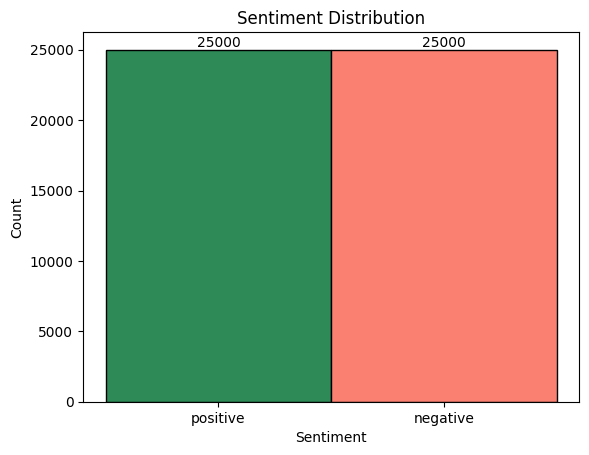

In [49]:
senti_counts = df['sentimiento'].value_counts()

ax = sns.histplot(x='sentiment', data=df, stat='count')
ax.patches[0].set_facecolor('seagreen')
ax.patches[1].set_facecolor('salmon')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()